# IFT 6390, Devoir 1
$\textbf{Auteurs}$: Adel Nabli, Myriam Laiymani

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Densité Gaussienne diagonale


* On stocke nos données dans une matrice $D$ de dimension $n \times d$, $D=\begin{pmatrix} x^{(1)} \\ ...\\ x^{(n)} \end{pmatrix}$, avec $\forall i \in [\![1,n]\!], x^{(i)} \in \mathbb{R}^d$

* Les paramètres appris sont $\mu = \begin{pmatrix} \mu_1 \\ ...\\ \mu_d \end{pmatrix}$ et $\sigma^2 = \begin{pmatrix} \sigma_1^2 \\ ...\\ \sigma_d^2 \end{pmatrix}$, tous deux étant dans $\mathbb{R}^d$


* La log-densité prédite est telle que $ \forall x \in \mathbb{R}^d, -\log( \hat{p}_{gauss-diag}(x))= \dfrac{d}{2} \log(2\pi) + \dfrac{1}{2} \log(\prod_{j=1}^d \sigma_j^2) + \dfrac{1}{2} \sum_{j=1}^d \dfrac{1}{\sigma_j^2}(x_j - \mu_j)^2$

In [2]:
class gaussian_diag(object):
    
    def __init__(self):
        
        self.n = 1
        self.d = 1
        self.mu = None
        self.sigma2 = None
    
    def train(self, D):
        
        """learn the parameters of the gaussian diagonal distribution on the dataset D"""
        
        self.n = np.shape(D)[0]
        self.d = np.shape(D)[1]
        
        self.mu = 1/self.n * np.sum(D, axis=0)
        self.sigma2 = 1/self.n * np.sum((D-self.mu)**2, axis=0)
    
    def predict(self, x):
        
        """predict the log distribution at a given point x in R^d"""
        
        return(self.d/2*np.log(2*np.pi) + 0.5*np.log(np.prod(self.sigma2)) + 0.5*np.sum((1/self.sigma2)*(x-self.mu)**2)) 

## Densité de Parzen


* Sachant que $\sigma$ est un hyper-paramètre, les seuls paramètres à "$\textit{apprendre}$" sont les $\mu_i$ qui ne sont en fait que les points de notre training set.


* La log-densité prédite est telle que $ \forall x \in \mathbb{R}^d$, $-\log (\hat{p}_{Parzen}(x))= \log(n)+ \dfrac{d}{2} \log(2\pi) + d \log(\sigma) -\log(\sum_{i=1}^n \exp(-\dfrac{1}{2\sigma^2}d(\mu_i,x)^2))$

In [3]:
class parzen(object):
    
    def __init__(self, sigma):
        
        self.sigma = sigma
        self.mu = None
        self.n = 1
        self.d = 1
    
    def train(self, D):
        
        """learn the parameters of the parzen distribution on the dataset D"""
        
        self.n = np.shape(D)[0]
        self.d = np.shape(D)[1]
        
        self.mu = D
    
    def predict(self, x):
        
        """predict the log distribution at a given point x in R^d"""
        
        return(np.log(self.n) + self.d/2*np.log(2*np.pi) + self.d*np.log(self.sigma) - np.log(np.sum(np.exp(-1/(2*self.sigma**2)*np.linalg.norm(self.mu-x, axis=1)**2))))

## Question 3

On charge les données que nous allons utiliser pour cette question

In [4]:
iris = np.loadtxt('iris.txt')
Data = iris[:50, 1] # On sélectionne la catégorie 1 et la 2ieme feature
D = np.reshape(Data, (len(Data),1)) # Pour éviter des problèmes avec l'implémentation matricielle de nos calculs,
                                    # On transforme notre "vecteur de données" en une matrice de dimension 50 x 1

On produit le graphique demandé

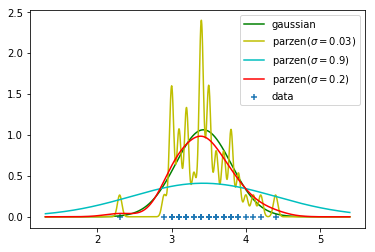

In [5]:
# On produit un échantillon de 2000 points tests qui nous permettra de tracer nos distributions.
# On a choisi une fenêtre de test qui est un peu plus large que les valeurs min et max apparues dans le train.

borne_inf = np.min(D)-1
borne_sup = np.max(D)+1
T = np.linspace(borne_inf, borne_sup, 2000)

# On entraîne notre modèle gaussien diagonale et on prédit une densité sur chaque point de notre échantillon

gauss = gaussian_diag()
gauss.train(D)
y_gauss = np.exp([-1*gauss.predict(t) for t in T])

# On entraîne nos modèles de parzen et on prédit une densité sur chaque point de notre échantillon pour chaque modèle.

parzen_petit = parzen(0.03)
parzen_petit.train(D)
y_parzen_petit = np.exp([-1*parzen_petit.predict(t) for t in T])

parzen_grand = parzen(0.9)
parzen_grand.train(D)
y_parzen_grand = np.exp([-1*parzen_grand.predict(t) for t in T])

parzen_bon = parzen(0.2)
parzen_bon.train(D)
y_parzen_bon = np.exp([-1*parzen_bon.predict(t) for t in T])

# On trace le graphe compilant tous nos calculs

plt.scatter(D, np.zeros_like(D), marker="+", label='data')
plt.plot(T, y_gauss, color='g', label='gaussian')
plt.plot(T, y_parzen_petit, color='y', label='parzen($\sigma = 0.03$)')
plt.plot(T, y_parzen_grand, color='c', label= 'parzen($\sigma = 0.9$)')
plt.plot(T, y_parzen_bon, color='r', label='parzen($\sigma = 0.2$)')
plt.legend()
plt.show()

Pour choisir $\sigma$, nous avons "tâtonné" jusqu'à trouver une valeur qui semblait produire un modèle qui semble bien se généraliser tout en évitant d'être trop "large".

## Question 4



In [6]:
D = iris[:50, :2] # On sélectionne la catégorie 1 et la 1iere et 2ieme feature

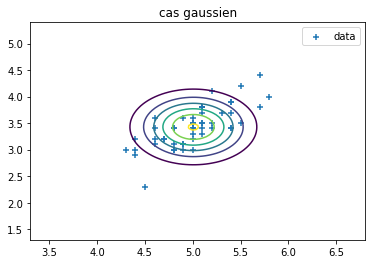

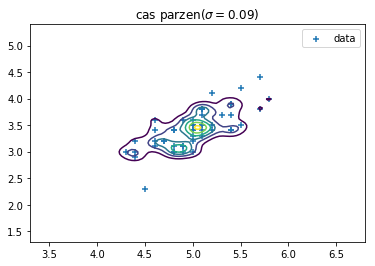

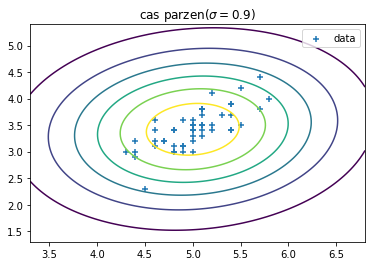

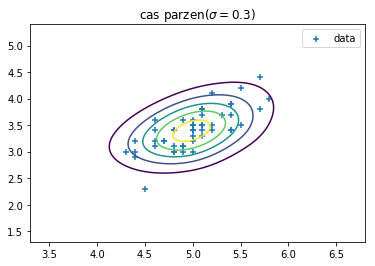

In [7]:
# On crée un échantillonage 2-dimensionnel de notre espace

borne_inf_0 = np.min(D[:, 0])-1
borne_sup_0 = np.max(D[:, 0])+1
T0 = np.linspace(borne_inf_0, borne_sup_0, 100)

borne_inf_1 = np.min(D[:, 1])-1
borne_sup_1 = np.max(D[:, 1])+1
T1 = np.linspace(borne_inf_1, borne_sup_1, 100)

T = np.reshape([[[i,j] for i in T0] for j in T1], (len(T0)*len(T1), 2))

# On entraîne notre modèle gaussien diagonale et on prédit une densité sur chaque point de notre échantillon

gauss = gaussian_diag()
gauss.train(D)
y_gauss = np.exp([-1*gauss.predict(t) for t in T])

# On entraîne nos modèles de parzen et on prédit une densité sur chaque point de notre échantillon pour chaque modèle.

parzen_petit = parzen(0.09)
parzen_petit.train(D)
y_parzen_petit = np.exp([-1*parzen_petit.predict(t) for t in T])

parzen_grand = parzen(0.9)
parzen_grand.train(D)
y_parzen_grand = np.exp([-1*parzen_grand.predict(t) for t in T])

parzen_bon = parzen(0.3)
parzen_bon.train(D)
y_parzen_bon = np.exp([-1*parzen_bon.predict(t) for t in T])

# On trace les 4 graphiques demandés

plt.scatter(D[:,0], D[:, 1], marker="+", label='data')
plt.contour(T0, T1, np.reshape(y_gauss, (len(T0), len(T1))))
plt.title('cas gaussien')
plt.legend()
plt.show()

plt.scatter(D[:,0], D[:, 1], marker="+", label='data')
plt.contour(T0, T1, np.reshape(y_parzen_petit, (len(T0), len(T1))))
plt.title('cas parzen($\sigma=0.09$)')
plt.legend()
plt.show()

plt.scatter(D[:,0], D[:, 1], marker="+", label='data')
plt.contour(T0, T1, np.reshape(y_parzen_grand, (len(T0), len(T1))))
plt.title('cas parzen($\sigma=0.9$)')
plt.legend()
plt.show()

plt.scatter(D[:,0], D[:, 1], marker="+", label='data')
plt.contour(T0, T1, np.reshape(y_parzen_bon, (len(T0), len(T1))))
plt.title('cas parzen($\sigma=0.3$)')
plt.legend()
plt.show()

De la même manière que précédemment, on choisi notre $\sigma$ en tâtonnant et grâce au graphique.